### Perform some simple data analysis
### Explore a variety of baseline classifiers including:
##### 1. Logistic Regression
##### 2. Random Forests
##### 3. SVM
##### 4. Feedforward Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
# 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
#
import keras

import os; 
# work-around to allow import from directory on same level
os.sys.path.append(os.path.dirname(os.path.abspath('.')))
from input.DataLoader import DataLoader


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# first 6 days of data are training set. Days 7 and 8 are dev set
traindays=[0,1]
devdays=[6]

In [3]:
path='../data/'
d=DataLoader(path)
traindf=d.get_days(traindays)
devdf=d.get_days(devdays)


In [4]:
print(traindf.shape)
print(traindf.info())
traindf.head()

(77909, 149)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 77909 entries, 0 to 38396
Columns: 149 entries, 0 to 148
dtypes: float64(149)
memory usage: 89.2 MB
None


,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
0,0.408275,-0.509405,0.403577,-0.479331,0.409877,-0.663252,0.402914,-0.37744,0.409493,-0.787505,...,-0.879782,-0.887778,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
1,0.408275,-0.604272,0.403577,-0.479331,0.410898,-0.683978,0.402914,-0.37744,0.410513,-0.799630,...,0.381572,0.370280,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
2,0.407254,-0.663731,0.403577,-0.479331,0.406815,-0.663252,0.402914,-0.37744,0.407452,-0.695636,...,-0.862017,-0.870059,0.0,0.0,0.0,3.0,3.0,2.0,2.0,2.0
3,0.407254,-0.530115,0.403577,-0.479331,0.408857,-0.238357,0.402914,-0.37744,0.409493,-0.467596,...,0.383221,0.371925,0.0,0.0,0.0,2.0,2.0,3.0,2.0,2.0
4,0.407254,-0.530115,0.403577,-0.479331,0.408857,-0.238357,0.402914,-0.37744,0.409493,-0.467596,...,-0.479532,-0.488573,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0


In [5]:
print(devdf.shape)
print(devdf.info())
devdf.head()

(37346, 149)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37346 entries, 0 to 37345
Columns: 149 entries, 0 to 148
dtypes: float64(149)
memory usage: 42.5 MB
None


,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
0,0.389172,-0.452436,0.388724,-0.447651,0.389772,-0.428775,0.388133,-0.701167,0.389413,-0.735306,...,3.018889,3.001688,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
1,0.388174,-0.526207,0.388724,-0.447651,0.387775,-0.783873,0.388133,-0.701167,0.388415,-0.652805,...,-0.742902,-0.751683,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
2,0.390171,-0.496699,0.392725,-0.479606,0.389772,-0.116564,0.390134,-0.544829,0.389413,-0.735306,...,0.431071,1.688134,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0
3,0.388174,-0.526207,0.388724,-0.447651,0.388773,-0.766718,0.388133,-0.701167,0.388415,-0.360815,...,-0.801795,-0.810791,0.0,0.0,0.0,3.0,3.0,1.0,2.0,2.0
4,0.390171,-0.489322,0.388724,-0.447651,0.389772,-0.116564,0.388133,-0.701167,0.389413,-0.735306,...,-0.786539,-0.824403,0.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0


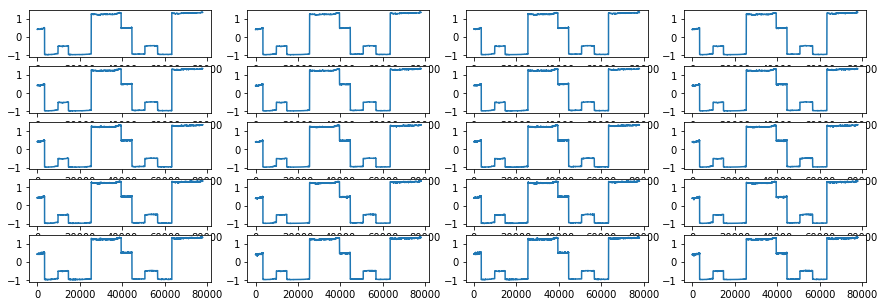

In [6]:
#plot rows containing book levels - note the breaks between the 5 stocks
fig=plt.figure(figsize=(15,5))
xaxis=np.arange(traindf.shape[0])
for i in np.arange(20):
     plt.subplot(5,4,i+1)
     plt.plot(xaxis,traindf.iloc[:,i*2])

In [7]:
train_stk_ind=d.get_stock_index(traindays)
dev_stk_ind=d.get_stock_index(devdays)
#flatten the lists of stock indices (change the function to return the flattened list)
t  = np.array([val for sublist in train_stk_ind for val in sublist])


### Snapshot of Order Book Data

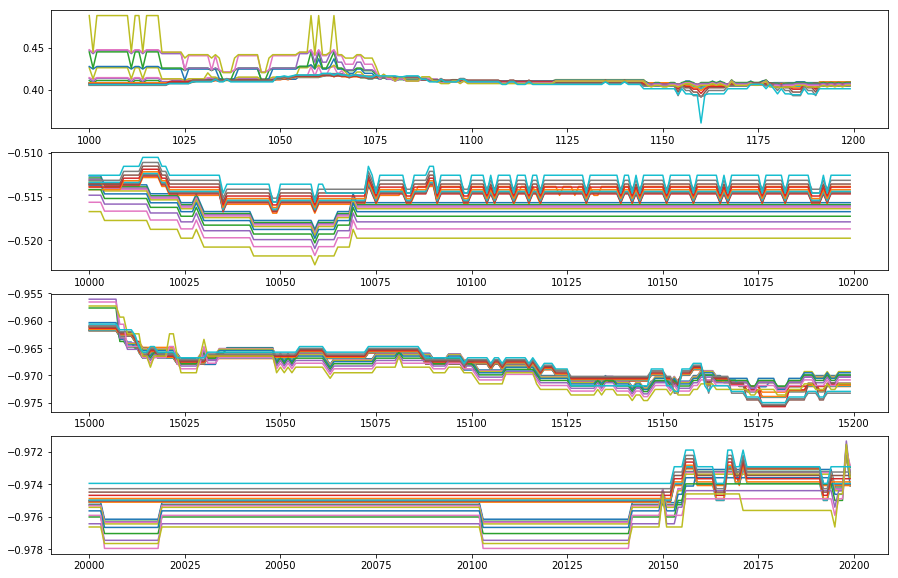

In [11]:
# plot 200 orderbook snapshots at 4 arbitrary locations
fig,axes=plt.subplots(4,1,figsize=(15,10))
x=[i+np.arange(200) for i in [1000,10000,15000,20000]]
for h,i in enumerate(x):
    for j in np.arange(20):
        axes[h].plot(i,traindf.iloc[i][j*2])
plt.savefig('img.jpg')

### Plot all the bids/asks for each ticker over all days in train set

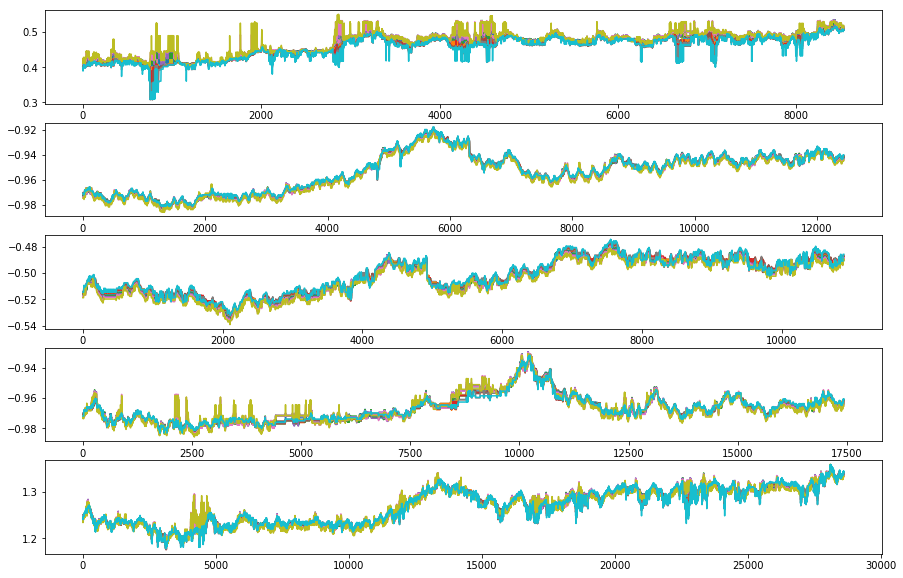

In [9]:
fig,axes=plt.subplots(5,1,figsize=(15,10))
for i in range(5):
    x=np.arange(np.sum(t==i))
    for j in np.arange(20):
        axes[i].plot(x,traindf.iloc[t==i][j*2])


### Distribution of Outcomes

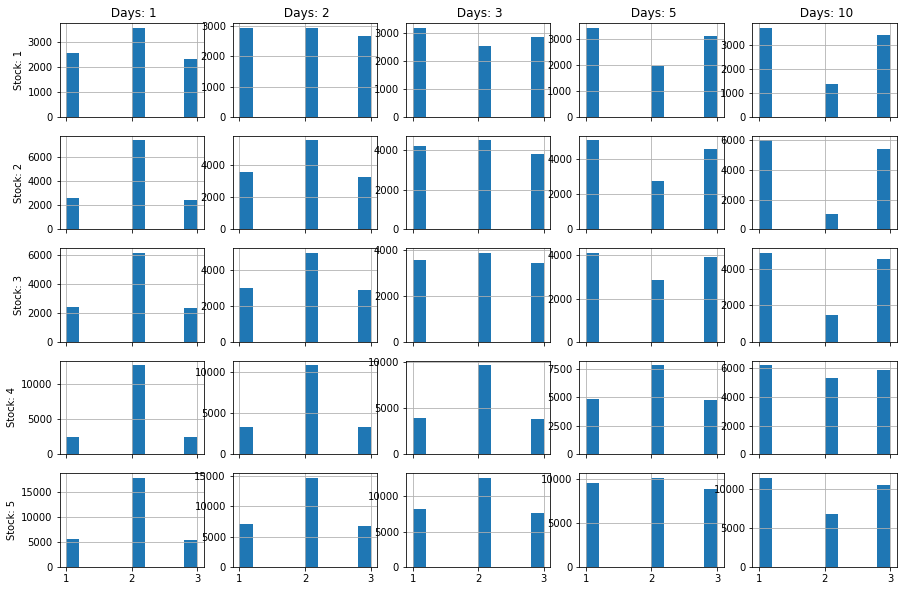

In [10]:
#histogram of 5 targets for each of 5 stocks
#notice that the number of unchanged entries (value 2) declines as we go from 1 day to 10-days
horizon=[1,2,3,5,10]
fig,axes=plt.subplots(5,5,figsize=(15,10),sharex=True)
for i in range(5):
    ti=t==i
    for j,k in enumerate([144,145,146,147,148]):
        traindf.loc[ti][k].hist(ax=axes[i,j])
        if i==0:
            axes[0,j].set_title(' Days: '+ str(horizon[j]))
        if j==0:
            axes[i,0].set_ylabel('Stock: '+str(i+1))
        #start=i

In [11]:
xdata=range(144)
ydata=[144,145,146,147,148]


In [12]:
def run_model(clf,Xtrain,Ytrain,Xdev,Ydev):
    
    model = clf.fit(Xtrain, Ytrain)

    # How well have we done on training data
    print ("Training ", i,)
    print("rows are y, columns are yhat")
    Yhat=model.predict(Xtrain)
    c=confusion_matrix(Ytrain,Yhat)
    c=np.concatenate((c,np.sum(c,axis=1).reshape(-1,1)),axis=1)
    c=np.concatenate((c,np.sum(c,axis=0).reshape(1,-1)),axis=0)
    print(c)
    print(classification_report(Yhat,Ytrain))
    print("cohen kappa score:",cohen_kappa_score(Yhat,Ytrain))
    # How well have we done on Validation data
    print("Test ", i)
    print("rows are y, columns are yhat")
    Yhat=model.predict(Xdev)
    c=confusion_matrix(Ydev,Yhat)
    c=np.concatenate((c,np.sum(c,axis=1).reshape(-1,1)),axis=1)
    c=np.concatenate((c,np.sum(c,axis=0).reshape(1,-1)),axis=0)
    print(c)
    print(classification_report(Yhat,Ydev))
    print("cohen kappa score:",cohen_kappa_score(Yhat,Ydev))

### Logistic Regression

In [13]:
clf=LogisticRegression(random_state=0,multi_class='multinomial',
                       solver='newton-cg',class_weight='balanced',max_iter=1000)

In [14]:
#train on each target 
for i,j in enumerate(ydata):   
    # Train model - We need to transpose data so that shape is: number of (examples x features)
    run_model(clf, traindf.iloc[:,xdata].values, 
              traindf.iloc[:,j].values,
              devdf.iloc[:,xdata].values,
              devdf.iloc[:,j].values)

   

Training  0
rows are y, columns are yhat
[[ 6677  4550  4256 15483]
 [11668 24110 11861 47639]
 [ 4034  4225  6528 14787]
 [22379 32885 22645 77909]]
             precision    recall  f1-score   support

        1.0       0.43      0.30      0.35     22379
        2.0       0.51      0.73      0.60     32885
        3.0       0.44      0.29      0.35     22645

avg / total       0.47      0.48      0.46     77909

cohen kappa score: 0.17248681970555657
Test  0
rows are y, columns are yhat
[[ 2939  3047  1839  7825]
 [ 4872 12587  4319 21778]
 [ 2069  3054  2620  7743]
 [ 9880 18688  8778 37346]]
             precision    recall  f1-score   support

        1.0       0.38      0.30      0.33      9880
        2.0       0.58      0.67      0.62     18688
        3.0       0.34      0.30      0.32      8778

avg / total       0.47      0.49      0.47     37346

cohen kappa score: 0.1488671098357427
Training  1
rows are y, columns are yhat
[[ 8193  6888  4840 19921]
 [ 7772 22896  8438 391

### Random Forest

In [15]:
# Create random forests object
clf = RandomForestClassifier(n_estimators=100, max_depth=3,class_weight='balanced',random_state=0)



In [16]:
for i,j in enumerate(ydata):   
    # Train model - We need to transpose data so that shape is: number of (examples x features)
    run_model(clf, traindf.iloc[:,xdata].values, 
              traindf.iloc[:,j].values,
              devdf.iloc[:,xdata].values,
              devdf.iloc[:,j].values)
    
    
  

Training  0
rows are y, columns are yhat
[[ 5232  6794  3457 15483]
 [ 6903 35302  5434 47639]
 [ 3770  6371  4646 14787]
 [15905 48467 13537 77909]]
             precision    recall  f1-score   support

        1.0       0.34      0.33      0.33     15905
        2.0       0.74      0.73      0.73     48467
        3.0       0.31      0.34      0.33     13537

avg / total       0.58      0.58      0.58     77909

cohen kappa score: 0.2306799657769354
Test  0
rows are y, columns are yhat
[[ 6562     0  1263  7825]
 [20560     0  1218 21778]
 [ 6234     0  1509  7743]
 [33356     0  3990 37346]]
             precision    recall  f1-score   support

        1.0       0.84      0.20      0.32     33356
        2.0       0.00      0.00      0.00         0
        3.0       0.19      0.38      0.26      3990

avg / total       0.77      0.22      0.31     37346

cohen kappa score: 0.008627255043211268


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Training  1
rows are y, columns are yhat
[[ 8854  7827  3240 19921]
 [ 3772 32068  3266 39106]
 [ 3471  7403  8008 18882]
 [16097 47298 14514 77909]]
             precision    recall  f1-score   support

        1.0       0.44      0.55      0.49     16097
        2.0       0.82      0.68      0.74     47298
        3.0       0.42      0.55      0.48     14514

avg / total       0.67      0.63      0.64     77909

cohen kappa score: 0.3772575011914202
Test  1
rows are y, columns are yhat
[[ 9341     0   689 10030]
 [17238     0   281 17519]
 [ 8161     0  1636  9797]
 [34740     0  2606 37346]]
             precision    recall  f1-score   support

        1.0       0.93      0.27      0.42     34740
        2.0       0.00      0.00      0.00         0
        3.0       0.17      0.63      0.26      2606

avg / total       0.88      0.29      0.41     37346

cohen kappa score: 0.03524255809990107


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Training  2
rows are y, columns are yhat
[[ 8856 10089  4155 23100]
 [ 3541 26976  2759 33276]
 [ 4423  9544  7566 21533]
 [16820 46609 14480 77909]]
             precision    recall  f1-score   support

        1.0       0.38      0.53      0.44     16820
        2.0       0.81      0.58      0.68     46609
        3.0       0.35      0.52      0.42     14480

avg / total       0.63      0.56      0.58     77909

cohen kappa score: 0.29587285524996276
Test  2
rows are y, columns are yhat
[[10800     0   749 11549]
 [14385     0   225 14610]
 [ 9637     0  1550 11187]
 [34822     0  2524 37346]]
             precision    recall  f1-score   support

        1.0       0.94      0.31      0.47     34822
        2.0       0.00      0.00      0.00         0
        3.0       0.14      0.61      0.23      2524

avg / total       0.88      0.33      0.45     37346

cohen kappa score: 0.03196818884686026


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Training  3
rows are y, columns are yhat
[[ 8779 13551  4783 27113]
 [ 3053 20239  2278 25570]
 [ 5308 12599  7319 25226]
 [17140 46389 14380 77909]]
             precision    recall  f1-score   support

        1.0       0.32      0.51      0.40     17140
        2.0       0.79      0.44      0.56     46389
        3.0       0.29      0.51      0.37     14380

avg / total       0.60      0.47      0.49     77909

cohen kappa score: 0.2015063765737286
Test  3
rows are y, columns are yhat
[[12475     0   934 13409]
 [10563     0   296 10859]
 [11458     0  1620 13078]
 [34496     0  2850 37346]]
             precision    recall  f1-score   support

        1.0       0.93      0.36      0.52     34496
        2.0       0.00      0.00      0.00         0
        3.0       0.12      0.57      0.20      2850

avg / total       0.87      0.38      0.50     37346

cohen kappa score: 0.02968249827941749


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Training  4
rows are y, columns are yhat
[[10186 11722 10342 32250]
 [ 1952 10392  3580 15924]
 [ 6055  9423 14257 29735]
 [18193 31537 28179 77909]]
             precision    recall  f1-score   support

        1.0       0.32      0.56      0.40     18193
        2.0       0.65      0.33      0.44     31537
        3.0       0.48      0.51      0.49     28179

avg / total       0.51      0.45      0.45     77909

cohen kappa score: 0.18999272486344942
Test  4
rows are y, columns are yhat
[[14017     1  1552 15570]
 [ 5775     0   694  6469]
 [12538     1  2768 15307]
 [32330     2  5014 37346]]
             precision    recall  f1-score   support

        1.0       0.90      0.43      0.59     32330
        2.0       0.00      0.00      0.00         2
        3.0       0.18      0.55      0.27      5014

avg / total       0.80      0.45      0.54     37346

cohen kappa score: 0.05734498781450703


In [17]:

#imp=np.flip(np.argsort(clf.feature_importances_),axis=0)[:10] #top 10 features
#plt.plot(np.sort(clf.feature_importances_))

### SVM

In [18]:
# Create multinomial logistic regression object
clf = svm.LinearSVC()

In [19]:
for i,j in enumerate(ydata):   
    # Train model - We need to transpose data so that shape is: number of (examples x features)
    run_model(clf, traindf.iloc[:,xdata].values, 
              traindf.iloc[:,j].values,
              devdf.iloc[:,xdata].values,
              devdf.iloc[:,j].values)
    

Training  0
rows are y, columns are yhat
[[  783 14132   568 15483]
 [  567 46501   571 47639]
 [  548 13493   746 14787]
 [ 1898 74126  1885 77909]]
             precision    recall  f1-score   support

        1.0       0.05      0.41      0.09      1898
        2.0       0.98      0.63      0.76     74126
        3.0       0.05      0.40      0.09      1885

avg / total       0.93      0.62      0.73     77909

cohen kappa score: 0.06183161306745477
Test  0
rows are y, columns are yhat
[[  181  7520   124  7825]
 [  112 21549   117 21778]
 [  150  7395   198  7743]
 [  443 36464   439 37346]]
             precision    recall  f1-score   support

        1.0       0.02      0.41      0.04       443
        2.0       0.99      0.59      0.74     36464
        3.0       0.03      0.45      0.05       439

avg / total       0.97      0.59      0.72     37346

cohen kappa score: 0.030222472313841897
Training  1
rows are y, columns are yhat
[[ 3818 14397  1706 19921]
 [ 1903 35804  1399 3

### Feed Forward Neural Network


In [20]:
i=148 # train on longest horizon (10-days)
Ytrain_label=traindf.iloc[:,i].values-1 # make labels 0 to 2
Ydev_label=devdf.iloc[:,i].values-1 # make labels 0 to 2
Ytrain_onehot=keras.utils.to_categorical(Ytrain_label) # use longest horizon
Ydev_onehot=keras.utils.to_categorical(Ydev_label) # use longest horizon

In [21]:
# dropout with 50% rate had big impact on overfitting
# batchnorm didn't seem to add anything
from keras import regularizers
model = keras.models.Sequential()

model.add(
    keras.layers.Dense(
        units=100,
        input_dim=len(xdata),
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        kernel_regularizer=regularizers.l2(0.01),
        activation='relu'))

model.add(
    keras.layers.Dropout(rate=0.5))

#model.add(
#    keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,
#                   center=True, scale=True, beta_initializer='zeros', ))

model.add(
    keras.layers.Dense(
        units=100,
        input_dim=100,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        kernel_regularizer=regularizers.l2(0.01),
        activation='relu'))

model.add(
    keras.layers.Dropout(rate=0.5))

#model.add(
#    keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,
#                  center=True, scale=True, beta_initializer='zeros', ))


model.add(
   keras.layers.Dense(
       units=Ytrain_onehot.shape[1],
       input_dim=100,
       kernel_initializer='glorot_uniform',
       bias_initializer='zeros',
       activation='softmax'))

In [22]:
#sgd with momentum actually works slightly better than adam with these parameters
sgd_optimizer=keras.optimizers.SGD(lr=0.001,decay=1e-7,momentum=0.9)
#adam_optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


In [23]:
model.compile(optimizer=sgd_optimizer,loss='categorical_crossentropy')

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               14500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 24,903
Trainable params: 24,903
Non-trainable params: 0
_________________________________________________________________


In [25]:
history=model.fit(traindf.iloc[:,xdata].values,Ytrain_onehot,batch_size=64,epochs=50,
                      validation_data=(devdf.iloc[:,xdata].values,Ydev_onehot),verbose=2)

Train on 77909 samples, validate on 37346 samples
Epoch 1/50
 - 2s - loss: 2.8090 - val_loss: 2.3281
Epoch 2/50
 - 2s - loss: 2.0742 - val_loss: 1.8168
Epoch 3/50
 - 2s - loss: 1.6632 - val_loss: 1.5021
Epoch 4/50
 - 2s - loss: 1.4108 - val_loss: 1.3106
Epoch 5/50
 - 2s - loss: 1.2515 - val_loss: 1.1901
Epoch 6/50
 - 2s - loss: 1.1528 - val_loss: 1.1179
Epoch 7/50
 - 2s - loss: 1.0928 - val_loss: 1.0743
Epoch 8/50
 - 2s - loss: 1.0548 - val_loss: 1.0486
Epoch 9/50
 - 2s - loss: 1.0306 - val_loss: 1.0308
Epoch 10/50
 - 2s - loss: 1.0172 - val_loss: 1.0220
Epoch 11/50
 - 2s - loss: 1.0073 - val_loss: 1.0145
Epoch 12/50
 - 2s - loss: 1.0021 - val_loss: 1.0114
Epoch 13/50
 - 2s - loss: 0.9980 - val_loss: 1.0059
Epoch 14/50
 - 2s - loss: 0.9950 - val_loss: 1.0123
Epoch 15/50
 - 2s - loss: 0.9922 - val_loss: 1.0114
Epoch 16/50
 - 2s - loss: 0.9926 - val_loss: 1.0095
Epoch 17/50
 - 2s - loss: 0.9900 - val_loss: 1.0044
Epoch 18/50
 - 2s - loss: 0.9889 - val_loss: 1.0082
Epoch 19/50
 - 2s - los

Text(0,0.5,'Cost')

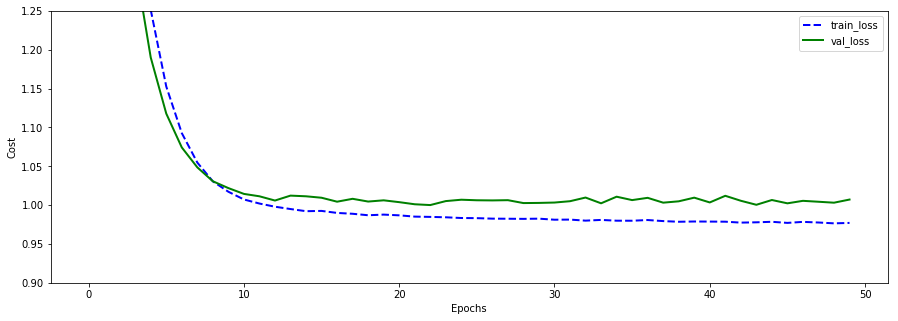

In [26]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'],'b--',lw=2,label='train_loss')
plt.plot(history.history['val_loss'],'g-',lw=2,label='val_loss')
plt.legend()
plt.ylim([.9,1.25])
plt.xlabel('Epochs')
plt.ylabel('Cost')

In [27]:
 # How well have we done on training data
print ("Training ", i)
Yhat=model.predict(traindf.iloc[:,xdata].values)
Yhat=np.argmax(Yhat,axis=1)
c=confusion_matrix(Ytrain_label,Yhat)
c=np.concatenate((c,np.sum(c,axis=1).reshape(-1,1)),axis=1)
c=np.concatenate((c,np.sum(c,axis=0).reshape(1,-1)),axis=0)
print(c)
print(classification_report(Yhat,Ytrain_label))
print("cohen kappa score:",cohen_kappa_score(Yhat,Ytrain_label))
# How well have we done on test data
print("Test ", i)
Yhat=model.predict(devdf.iloc[:,xdata].values) 
Yhat=np.argmax(Yhat,axis=1)
c=confusion_matrix(Ydev_label,Yhat)
c=np.concatenate((c,np.sum(c,axis=1).reshape(-1,1)),axis=1)
c=np.concatenate((c,np.sum(c,axis=0).reshape(1,-1)),axis=0)
print(c)
print(classification_report(Yhat,Ydev_label))
print("cohen kappa score:",cohen_kappa_score(Yhat,Ydev_label))

Training  148
[[21934  1169  9147 32250]
 [ 6781  4104  5039 15924]
 [11190  1001 17544 29735]
 [39905  6274 31730 77909]]
             precision    recall  f1-score   support

          0       0.68      0.55      0.61     39905
          1       0.26      0.65      0.37      6274
          2       0.59      0.55      0.57     31730

avg / total       0.61      0.56      0.57     77909

cohen kappa score: 0.28482458245591624
Test  148
[[10392   476  4702 15570]
 [ 3777   527  2165  6469]
 [ 7016   458  7833 15307]
 [21185  1461 14700 37346]]
             precision    recall  f1-score   support

          0       0.67      0.49      0.57     21185
          1       0.08      0.36      0.13      1461
          2       0.51      0.53      0.52     14700

avg / total       0.58      0.50      0.53     37346

cohen kappa score: 0.1637718368753489
